In [1]:
from moredata.datasets import get_path
from moredata import Converter
import pandas as pd

df = pd.read_csv(get_path("airbnb-berlin-main"))
df = df.loc[(~df['latitude'].isna()) & (~df['longitude'].isna())]
df.to_json('./data/airbnb-berlin.json', orient='records')

/home/thomas/anaconda3/envs/moredata-dev/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.2-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [1]:
import pandas as pd
df = pd.read_csv (r'./data/preprocessed_events_dates_sp_sample.csv')

df.iloc[0:2000000].to_json (r'./data/2kk_preprocessed_events_dates_sp_sample.json')

In [3]:
import moredata

data = moredata.models.JsonData(data_file='./data/airbnb-berlin.json', parser=moredata.parser.parse_document)

osm_enricher = moredata.enricher.osm.OSMPlacesConnector(place_name="Berlin, DE", files=['./data/tourism.csv.gz'], radius=50, geometry_intersected=True)

data_enriched = osm_enricher.enrich(data)

moredata.utils.write_json_generator_to_json("./data/airbnb-berlin-enriched", data_enriched, 100000)

/home/thomas/github/more-data/moredata/enricher/osm/osm_places_connector.py:90: DtypeWarning: Columns (4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,169,170,171,173,174,175,176,178,179,180,181,182,183,184,185,186,187,188,190,191,192,193,194,195,196,197,198,199,200,201,202,203,205,206,207,208,209,210,211,214,215,216,217,218,219,220,221,222,223,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,259,260,261,262,263,264,265,266,2

In [1]:
import moredata
import time
import psutil
inicio = time.time()
psutil.cpu_percent()

data = moredata.models.JsonData(data_file='./data/2kk_preprocessed_events_dates_sp_sample.json', parser=moredata.parser.parse_document)

osm_enricher = moredata.enricher.osm.OSMPlacesConnector(place_name="São Paulo, BR", files=['./data/tourism.csv.gz'], radius=5000, geometry_intersected=True)

data_enriched = osm_enricher.enrich(data)

moredata.utils.write_json_generator_to_json("./datapreprocessed_events_dates_sp_sample_enriched", data_enriched, 100000)

cpu_usage = psutil.cpu_percent()
fim = time.time()
final_mem =psutil.virtual_memory()
  
print(f'Tempo de execucao: {fim - inicio}')
print(f'% de uso de cpu: {cpu_usage}')
print(f'Quantidade de memoria inicial: {inicio_mem.used >> 20} MB')
print(f'Quantidade de memoria final: {final_mem.used >> 20} MB')
print(f'Uso aproximado de memoria {final_mem.used - inicio_mem.used >> 20} MB')

/home/thomas/anaconda3/envs/moredata-dev/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.2-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/home/thomas/github/more-data/moredata/enricher/osm/osm_places_connector.py:90: DtypeWarning: Columns (4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,169,170,171,173,174,175,176,178,179,180,181,182,183,184,185,18

FileNotFoundError: [Errno 2] No such file or directory: './data/2kkpreprocessed_events_dates_sp_sample.json'

In [3]:
#Geopandas
import pandas as pd
import moredata
import geopandas
import time
import psutil

inicio = time.time()
psutil.cpu_percent()

df = pd.read_csv("./data/preprocessed_events_dates_sp_sample.csv")
df = df.loc[(~df['latitude'].isna()) & (~df['longitude'].isna())]

gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))
data = moredata.models.GeopandasData().from_geodataframe(gdf.iloc[0:5000])

osm_enricher = moredata.enricher.osm.OSMPlacesConnector(place_name="São Paulo, BR", files=['./data/tourism.csv.gz'], radius=1000, geometry_intersected=False)

data_enriched = osm_enricher.enrich(data)

cpu_usage = psutil.cpu_percent()
fim = time.time()

  
print("The CPU usage is : ", cpu_usage)

print(f'Tempo de execucao{fim - inicio}')


/home/thomas/github/more-data/moredata/enricher/osm/osm_places_connector.py:90: DtypeWarning: Columns (4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,169,170,171,173,174,175,176,178,179,180,181,182,183,184,185,186,187,188,190,191,192,193,194,195,196,197,198,199,200,201,202,203,205,206,207,208,209,210,211,214,215,216,217,218,219,220,221,222,223,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,259,260,261,262,263,264,265,266,2

The CPU usage is :  38.1
Tempo de execucao39.97045969963074


In [4]:
data_enriched[~data_enriched["index_right"].isna()]

,h3_hash,app_user_id,date_time,cod_municipio,latitude,longitude,geometry,index_right,Unnamed: 0,type,...,military,healthcare,healthcare:speciality,emergency,opening_date,operational_status,hotspot,contact:instagram,internet_access:operator,addr:housename
412,8aa8100c3327fff,30884963,2021-12-05T07:05:04.000-03:00,3550308,-23.53546,-46.63467,POINT (-46.63467 -23.53546),640.0,640.0,way,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1407,8aa81009a267fff,69990727,2021-12-05T06:56:30.000-03:00,3550308,-23.57188,-46.44608,POINT (-46.44608 -23.57188),925.0,925.0,way,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1567,8aa8100ce20ffff,59649806,2021-12-04T17:42:11.000-03:00,3550308,-23.51837,-46.65659,POINT (-46.65659 -23.51837),705.0,705.0,way,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3622,8aa8100ce69ffff,28184960,2021-12-04T17:02:27.000-03:00,3550308,-23.51641,-46.64248,POINT (-46.64248 -23.51641),699.0,699.0,way,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3937,8aa8100e3267fff,54169461,2021-12-04T17:36:56.000-03:00,3550308,-23.58311,-46.66123,POINT (-46.66123 -23.58311),671.0,671.0,way,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4372,8aa8100e304ffff,66927973,2021-12-04T11:19:45.000-03:00,3550308,-23.58800,-46.65525,POINT (-46.65525 -23.58800),671.0,671.0,way,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4518,8aa8100006e7fff,11335847,2021-12-04T06:23:29.000-03:00,3550308,-23.69951,-46.63062,POINT (-46.63062 -23.69951),1073.0,1073.0,way,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
import pandas as pd
df3 = pd.read_csv("./data/preprocessed_events_dates_sp_sample.csv")

In [5]:
print(df3.index)

RangeIndex(start=0, stop=11351545, step=1)


In [2]:
data_enriched.head()

,h3_hash,app_user_id,date_time,cod_municipio,latitude,longitude,geometry,index_right,Unnamed: 0,type,...,military,healthcare,healthcare:speciality,emergency,opening_date,operational_status,hotspot,contact:instagram,internet_access:operator,addr:housename
0,8aa810008bb7fff,56961170,2021-12-05T11:56:38.000-03:00,3550308,-23.66844,-46.68029,POINT (-46.68029 -23.66844),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8aa810011737fff,65572294,2021-12-05T16:26:21.000-03:00,3513801,-23.68624,-46.58632,POINT (-46.58632 -23.68624),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8aa81001c227fff,71044967,2021-12-04T13:28:25.000-03:00,3513801,-23.67265,-46.61749,POINT (-46.61749 -23.67265),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8aa8100825b7fff,63526401,2021-12-05T10:18:08.000-03:00,3550308,-23.63283,-46.44711,POINT (-46.44711 -23.63283),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8aa8100912dffff,63796451,2021-12-05T14:35:11.000-03:00,3550308,-23.61167,-46.44392,POINT (-46.44392 -23.61167),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
import dask
from distributed import Client, LocalCluster

dask.config.set({"distributed.nanny.environ.MALLOC_TRIM_THRESHOLD_": 0})

cluster = LocalCluster(n_workers=4, threads_per_worker=2, memory_limit='2GB')
client = Client(cluster)

client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 7.45 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40621,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 7.45 GiB
Comm: tcp://127.0.0.1:43405,Total threads: 2
Dashboard: http://127.0.0.1:40893/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:38295,


In [2]:
#Dask
import pandas as pd
import moredata
import geopandas
import time
import psutil

inicio = time.time()
psutil.cpu_percent()
inicio_mem = psutil.virtual_memory()

df2 = pd.read_csv("./data/preprocessed_events_dates_sp_sample.csv")
df2 = df2.loc[(~df2['latitude'].isna()) & (~df2['longitude'].isna())]

gdf2 = geopandas.GeoDataFrame(df2, geometry=geopandas.points_from_xy(df2.longitude, df2.latitude))
data2 = moredata.models.DaskGeopandasData().from_geodataframe(gdf2.iloc[0:50000])

osm_enricher2 = moredata.enricher.osm.OSMPlacesConnector(place_name="São Paulo, BR", files=['./data/tourism.csv.gz'], radius=5000, geometry_intersected=True)

data_enriched2 = osm_enricher2.enrich(data2)


cpu_usage = psutil.cpu_percent()
fim = time.time()
final_mem =psutil.virtual_memory()
  
print(f'Tempo de execucao: {fim - inicio}')
print(f'% de uso de cpu: {cpu_usage}')
print(f'Quantidade de memoria inicial: {inicio_mem.used >> 20} MB')
print(f'Quantidade de memoria final: {final_mem.used >> 20} MB')
print(f'Uso aproximado de memoria {final_mem.used - inicio_mem.used >> 20} MB')


/home/thomas/anaconda3/envs/moredata-dev/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.2-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/home/thomas/github/more-data/moredata/enricher/osm/osm_places_connector.py:90: DtypeWarning: Columns (4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,169,170,171,173,174,175,176,178,179,180,181,182,183,184,185,18

Tempo de execucao: 20.45258378982544
% de uso de cpu: 59.1
Quantidade de memoria inicial: 5165 MB
Quantidade de memoria final: 9137 MB
Uso aproximado de memoria 3972 MB


In [5]:
data_enriched2.head()

,h3_hash,app_user_id,date_time,cod_municipio,latitude,longitude,geometry,index_right,Unnamed: 0,type,...,military,healthcare,healthcare:speciality,emergency,opening_date,operational_status,hotspot,contact:instagram,internet_access:operator,addr:housename
412,8aa8100c3327fff,30884963,2021-12-05T07:05:04.000-03:00,3550308,-23.53546,-46.63467,POINT (-46.63467 -23.53546),640,640,way,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1407,8aa81009a267fff,69990727,2021-12-05T06:56:30.000-03:00,3550308,-23.57188,-46.44608,POINT (-46.44608 -23.57188),925,925,way,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1567,8aa8100ce20ffff,59649806,2021-12-04T17:42:11.000-03:00,3550308,-23.51837,-46.65659,POINT (-46.65659 -23.51837),705,705,way,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3622,8aa8100ce69ffff,28184960,2021-12-04T17:02:27.000-03:00,3550308,-23.51641,-46.64248,POINT (-46.64248 -23.51641),699,699,way,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3937,8aa8100e3267fff,54169461,2021-12-04T17:36:56.000-03:00,3550308,-23.58311,-46.66123,POINT (-46.66123 -23.58311),671,671,way,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


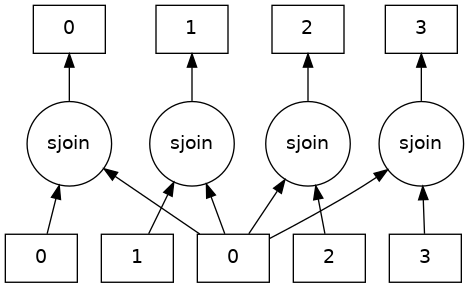

In [5]:
osm_enricher2.enrich(data2).visualize()

In [5]:
type(data2)

moredata.models.data.DaskGeopandasData

In [3]:
df3 = pd.read_csv("../data/preprocessed_events_dates_sp_sample.csv")
df3.head()

,h3_hash,app_user_id,date_time,cod_municipio,latitude,longitude
0,8aa810008bb7fff,56961170,2021-12-05T11:56:38.000-03:00,3550308,-23.66844,-46.68029
1,8aa810011737fff,65572294,2021-12-05T16:26:21.000-03:00,3513801,-23.68624,-46.58632
2,8aa81001c227fff,71044967,2021-12-04T13:28:25.000-03:00,3513801,-23.67265,-46.61749
3,8aa8100825b7fff,63526401,2021-12-05T10:18:08.000-03:00,3550308,-23.63283,-46.44711
4,8aa8100912dffff,63796451,2021-12-05T14:35:11.000-03:00,3550308,-23.61167,-46.44392


In [5]:
import pandas as pd
df_enriched = pd.read_json('./data/airbnb-berlin-enriched-0.json', orient='records')

In [6]:
df_enriched.loc[(~df_enriched['local'].isna()) & (~df_enriched['geometry_intersected'].isna()), 'near_tourism_places'] = 'Yes'
df_enriched['near_tourism_places'] = df_enriched['near_tourism_places'].fillna('No')

In [7]:
df_enriched['price'] = df_enriched['price'].apply(lambda x: float(x.replace('$', '').replace(',', '')))

In [8]:
df_enriched['price'].describe()

count    19858.000000
mean        70.776866
std        120.384857
min          0.000000
25%         35.000000
50%         50.000000
75%         80.000000
max       8000.000000
Name: price, dtype: float64

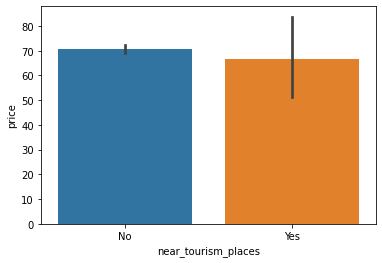

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(y="price", x="near_tourism_places", data=df_enriched)
plt.show()

In [10]:
import folium
from moredata.utils import geodesic_point_buffer
from shapely.geometry.polygon import Polygon
from shapely import wkt
import geopandas as gpd
from util import add_categorical_legend

poi = df_enriched.loc[(~df_enriched['geometry_intersected'].isna())][['geometry_intersected', 'latitude', 'longitude']] \
                    .reset_index().iloc[[5]]

polygon = wkt.loads(poi['geometry_intersected'][5][0])
latitude = poi['latitude'].squeeze()
longitude = poi['longitude'].squeeze()

shp = Polygon(geodesic_point_buffer(latitude, longitude, 50))

m = folium.Map(location=[latitude, longitude], zoom_start=17, tiles='CartoDB positron')
folium.Marker(
    [latitude, longitude], icon=folium.Icon(color="blue"), popup='Point of Interest'
).add_to(m)

sim_geo = gpd.GeoSeries.from_wkt([shp.wkt])
geo_j = sim_geo.to_json()

geo_j = folium.GeoJson(data=geo_j,
                        style_function=lambda x: {'fillColor': 'grey'})
geo_j.add_to(m)
    
sim_geo = gpd.GeoSeries(polygon)
geo_j = sim_geo.to_json()

geo_j = folium.GeoJson(data=geo_j,
                       style_function=lambda x: {'fillColor': 'black', 'color': 'black'})
geo_j.add_to(m)

m = add_categorical_legend(m, 'Polygons',
                             colors = ['blue','black'],
                           labels = ['Point of Interest', 'Tourism Place'])

m